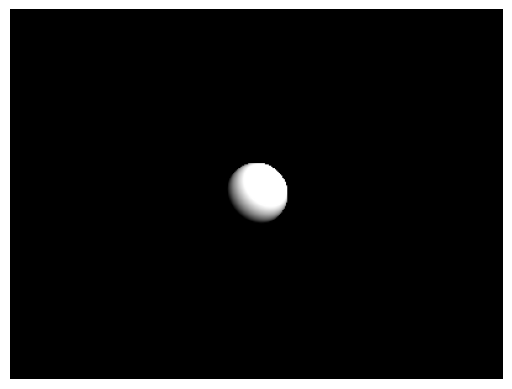

In [5]:
## ray tracing scheme
import numpy as np
import matplotlib.pyplot as plt

# Define the scene
width, height = 400, 300
aspect_ratio = width / height
camera_position = np.array([0, 0, 1])
sphere_center = np.array([0, 0, -5])
sphere_radius = 1
light_position = np.array([5, 5, 5])
light_intensity = 1.5

# Define the image plane
image_plane = np.zeros((height, width, 3))

# Function to normalize vectors
def normalize(v):
    return v / np.linalg.norm(v)

# Function to compute the intersection of a ray with a sphere
def intersect_sphere(ray_origin, ray_direction, sphere_center, sphere_radius):
    oc = ray_origin - sphere_center
    a = np.dot(ray_direction, ray_direction)
    b = 2.0 * np.dot(oc, ray_direction)
    c = np.dot(oc, oc) - sphere_radius * sphere_radius
    discriminant = b * b - 4 * a * c
    if discriminant < 0:
        return False, None
    t = (-b - np.sqrt(discriminant)) / (2.0 * a)
    return True, t

# Ray tracing loop
for i in range(height):
    for j in range(width):
        # Compute the direction of the ray
        x = (2 * (j + 0.5) / width - 1) * aspect_ratio
        y = 1 - 2 * (i + 0.5) / height
        ray_direction = normalize(np.array([x, y, -1]))
        
        # Check for intersection with the sphere
        hit, t = intersect_sphere(camera_position, ray_direction, sphere_center, sphere_radius)
        if hit:
            # Compute the intersection point
            intersection_point = camera_position + t * ray_direction
            
            # Compute the normal at the intersection point
            normal = normalize(intersection_point - sphere_center)
            
            # Compute the direction to the light
            light_direction = normalize(light_position - intersection_point)
            
            # Compute the intensity of the light at the intersection point
            intensity = max(0, np.dot(normal, light_direction)) * light_intensity
            
            # Set the pixel color
            image_plane[i, j] = np.array([intensity, intensity, intensity])

# Display the image
plt.imshow(np.clip(image_plane, 0, 1))
plt.axis('off')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D

# Constants
M = 1.0  # Mass of the black hole
rs = M / 2  # Schwarzschild radius in natural units (c = G = 1)

# Create a grid of points in isotropic coordinates
r = np.linspace(rs / 2, 10 * rs, 500)
theta = np.linspace(0, np.pi, 500)
phi = np.linspace(0, 2 * np.pi, 500)
r, theta, phi = np.meshgrid(r, theta, phi)

# Convert to Cartesian coordinates
x = r * np.sin(theta) * np.cos(phi)
y = r * np.sin(theta) * np.sin(phi)
z = r * np.cos(theta)

# Calculate the isotropic Schwarzschild metric components
psi = (1 + M / (2 * r)) / (1 - M / (2 * r))
g_tt = -(1 - M / (2 * r))**2 / (1 + M / (2 * r))**2
g_rr = psi**4

# Plot the spacetime curvature
# fig = plt.figure(figsize=(10, 8))
# ax = fig.add_subplot(111, projection='3d')
# ax.plot_surface(x[:, :, 0], y[:, :, 0], g_tt[:, :, 0], cmap='inferno')
# ax.set_title('Spacetime Curvature around a Black Hole in Isotropic Coordinates')
# ax.set_xlabel('x')
# ax.set_ylabel('y')
# ax.set_zlabel('g_tt')
# plt.show()

-1.034503254583776
-1.0332923606027826
-1.0314333084564473
-1.028936467973483
-1.0258156132063785
-1.0220877154155363
-1.0177726934955122
-1.0128931288455527
-1.007473952389529
-1.001542111823024
-0.995126227213234
-0.9882562428241036
-0.9809630825230604
-0.9732783153959258
-0.9652338373081514
-0.9568615731604843
-0.9481932035503481
-0.9392599185163008
-0.9300922000540959
-0.9207196341825493
-0.9111707525297592
-0.9014729027204238
-0.8916521462800588
-0.8817331823318468
-0.8717392950410616
-0.861692322550759
-0.8516126450382007
-0.8415191894901461
-0.8314294488321797
-0.8213595131382736
-0.8113241107784749
-0.8013366575228574
-0.7914093117981874
-0.7815530344812205
-0.7717776518019781
-0.7620919201159971
-0.7525035914821843
-0.7430194791494125
-0.7336455222084118
-0.7243868488046661


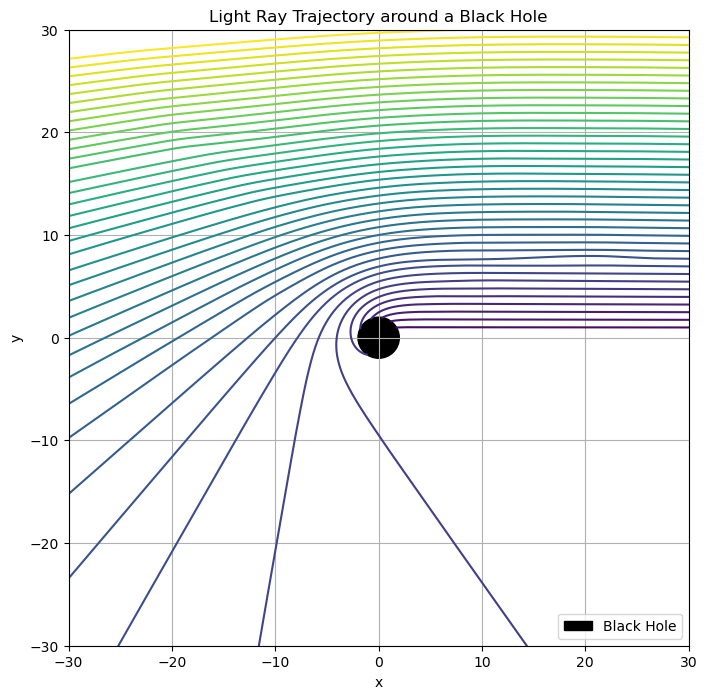

In [15]:
# solve geodesics for photons in Schwarzschild metric
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Constants
# G = 6.67430e-11  # Gravitational constant
# c = 3.0e8        # Speed of light
# M = 1.0e30       # Mass of the black hole (in kg)
c, G = 1, 1
M = 1
rs = 2 * G * M / c**2  # Schwarzschild radius

import matplotlib.patches as patches
# Plot the trajectory of the light ray
fig, ax = plt.subplots(figsize=(8, 8))
# Define a colormap
cmap = plt.get_cmap('viridis')



# Geodesic equations for Schwarzschild metric
def geodesics(t, var):
    #conserved quantities
    #pt=-E, pphi=L
    # rad, the, phi, prad, pthe, pphi = y
    t, rad, the, phi, pt, prad, pthe, pphi = var
    gUU00, gUU11, gUU22, gUU33 = -1/(1-rs/rad), (1-rs/rad), 1/rad**2, 1/(rad**2 * np.sin(the)**2)
    # gDD00, gDD11, gDD22, gDD33 = -(1-rs/rad), 1/(1-rs/rad), rad**2, rad**2 * np.sin(the)**2
    d0gUU00, d0gUU11, d0gUU22, d0gUU33 = 0, 0, 0, 0
    d1gUU00, d1gUU11, d1gUU22, d1gUU33 = rs/rad**2 / (1-rs/rad)**2, rs/rad**2, -2/rad**3, -2/(rad**3 * np.sin(the)**2)
    d2gUU00, d2gUU11, d2gUU22, d2gUU33 = 0, 0, 0, 2*np.cos(the)/(rad**2*np.sin(the)**3)
    d3gUU00, d3gUU11, d3gUU22, d3gUU33 = 0, 0, 0, 0
    # pt = -np.sqrt(-(prad**2 * gUU11 + pthe**2 * gUU22 + pphi**2 * gUU33) / gUU00)
    # m2 = pt**2 * gUU00 + prad**2 * gUU11 + pthe**2 * gUU22 + pphi**2 * gUU33
    # print(m2)
    dtdt    = pt   * gUU00
    draddt  = prad * gUU11
    dthedt  = pthe * gUU22
    dphidt  = pphi * gUU33 
    dptdt   = -1/2 * (d0gUU00 * pt**2 + d0gUU11 * prad**2 + d0gUU22 * pthe**2 + d0gUU33 * pphi**2) # 0
    dpraddt = -1/2 * (d1gUU00 * pt**2 + d1gUU11 * prad**2 + d1gUU22 * pthe**2 + d1gUU33 * pphi**2)
    dpthedt = -1/2 * (d2gUU00 * pt**2 + d2gUU11 * prad**2 + d2gUU22 * pthe**2 + d2gUU33 * pphi**2)
    dpphidt = -1/2 * (d3gUU00 * pt**2 + d3gUU11 * prad**2 + d3gUU22 * pthe**2 + d3gUU33 * pphi**2) # 0
    return [dtdt, draddt, dthedt, dphidt, dptdt, dpraddt, dpthedt, dpphidt]
    # return [draddt, dthedt, dphidt, dpraddt, dpthedt, dpphidt]

# Initial conditions
box_size = 15*rs
L_arr = np.linspace(1,box_size,40)
for L in L_arr:
# L = 6
    coord_x0 = box_size
    coord_y0 = L/c
    coord_z0 = 0

    rad0 = np.sqrt(coord_x0**2 + coord_y0**2 + coord_z0**2)
    E = -np.sqrt(1- rs/rad0)
    the0 = np.arccos(coord_z0 / rad0)
    phi0 = np.arctan2(coord_y0, coord_x0)



    coord_vthe0 = np.pi/2
    coord_vphi0 = - np.pi

    pt0 = -E
    pphi0 = L
    pthe0 = 0.0
    prad0 = -np.sqrt(-(E**2 * -1/(1-rs/rad0) + L**2 * 1/(rad0**2 * np.sin(the0)**2))/(1-rs/rad0))
    print(prad0)


    t0 = 0 
    pt0 = -E

    # Time span for the integration
    t_span = (0, 100)
    var0 = [rad0, the0, phi0, prad0, pthe0, pphi0]
    var0 = [t0, rad0, the0, phi0, pt0, prad0, pthe0, pphi0]

    # Solve the geodesic equations
    sol = solve_ivp(geodesics, t_span, var0, method='RK45', t_eval=np.linspace(t_span[0], t_span[1], 10000))

    # Extract the solution
    # rad = sol.y[0]
    # the = sol.y[1]
    # phi = sol.y[2]

    
    rad = sol.y[1]
    the = sol.y[2]
    phi = sol.y[3]
    # Convert to Cartesian coordinates for plotting
    x = rad * np.sin(the) * np.cos(phi)
    y = rad * np.sin(the) * np.sin(phi)

    ax.plot(x, y, color=cmap(L / np.max(L_arr)))
    

# Add a circle with radius 2 at the origin to represent the black hole
circle = patches.Circle((0, 0), 2, color='black', label='Black Hole')
ax.add_patch(circle)


ax.set_xlim(-box_size, box_size)
ax.set_ylim(-box_size, box_size)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Light Ray Trajectory around a Black Hole')
ax.legend()
ax.grid(True)
plt.show()